In [395]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as soup
from requests import get
import matplotlib.pyplot as plt
%matplotlib inline

url = get("https://www.imdb.com/search/title/?genres=action&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=5aab685f-35eb-40f3-95f7-c53f09d542c3&pf_rd_r=BG1CG1TDYDB4FQYYS55B&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_1")
request = url.text
request

data = soup(request, 'html.parser')
divs = data.find_all('div', {'class': 'lister-item mode-advanced'})

In [447]:
movie_name = []
description = []
release_date = []
director_name = []
rating = []
duration = []
votes = []
stars = []
budget = []
genre = []

# movie_name
for div in divs:
    content = div.find('div', {'class': 'lister-item-content'})
    titles = content.find('a').get_text()
    movie_name.append(titles)

# rating
for div in divs:
    content = div.find('div', {'class': 'lister-item-content'})
    rate = content.find('strong').get_text()
    rating.append(rate)

# duration
for div in divs:
    content = div.find('div', {'class': 'lister-item-content'})
    time = content.find('span', {'class': 'runtime'}).get_text()[:3]
    duration.append(int(time))

# release_date
for div in divs:
    content = div.find('span',{'class': 'lister-item-year text-muted unbold'}).text
    for text in content.split():
        num = text.replace("(", "").replace(")", "")
        if num.isdigit():
            release_date.append(int(num))

# votes
for div in divs:
    content = div.find('div', {'class': 'lister-item-content'})
    vote = content.find('span', {'name': 'nv'}).get_text().replace(',','')
    if vote == "[]":
        vote = None
    else:
        votes.append(int(vote))

# director_name
for div in divs:
    content = div.find('div', {'class': 'lister-item-content'})
    find_p = content.find_all('p')[2]
    find_a = find_p.find_all('a')[0].get_text()
    director_name.append(find_a)

# genre
for div in divs:
    content = div.find('div', {'class': 'lister-item-content'})
    gernes = content.find('p')
    ger = gernes.find('span', {'class' : "genre"}).get_text().strip('\n')
    genre.append(ger)

# stars
for div in divs:
    star_list = []
    content = div.find('div', {'class': 'lister-item-content'})
    find_p = content.find_all('p')[2]
    find_a = find_p.find_all('a')[1:4]
    for e in find_a:
        star_list.append(e.get_text())
    stars.append(", ".join(star_list))

# budget
for div in divs:
    content = div.find('div',{'class': 'lister-item-content'})
    find_p = content.find_all('p')[3]
    find_span = find_p.find_all('span')[1].get_text().replace(",", "")
    budget.append(int(find_span))

In [448]:
data_df = {}
data_df["Movie name"] = movie_name
data_df["Release date"] = release_date
data_df["Director name"] = director_name
data_df["Rating over 10"] = rating
data_df["Duration in min"] = duration
data_df["Genre"] = genre
data_df["Stars"] = stars
data_df["Votes"] = votes
data_df["Budget in M$"] = budget

df = pd.DataFrame(data_df)
df.head()

,Movie name,Release date,Director name,Rating over 10,Duration in min,Genre,Stars,Votes,Budget in M$
0,El caballero oscuro,2008,Christopher Nolan,9.0,152,"Action, Crime, Drama","Christian Bale, Heath Ledger, Aaron Eckhart",2329294,2329294
1,El señor de los anillos: El retorno del rey,2003,Peter Jackson,8.9,201,"Action, Adventure, Drama","Elijah Wood, Viggo Mortensen, Ian McKellen",1657517,1657517
2,Montaña II,2016,Alper Caglar,8.8,135,"Action, Drama, War","Caglar Ertugrul, Ufuk Bayraktar, Ahu Türkpençe",105546,105546
3,Origen,2010,Christopher Nolan,8.8,148,"Action, Adventure, Sci-Fi","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2090114,2090114
4,El señor de los anillos: La comunidad del anillo,2001,Peter Jackson,8.8,178,"Action, Adventure, Drama","Elijah Wood, Ian McKellen, Orlando Bloom",1677215,1677215


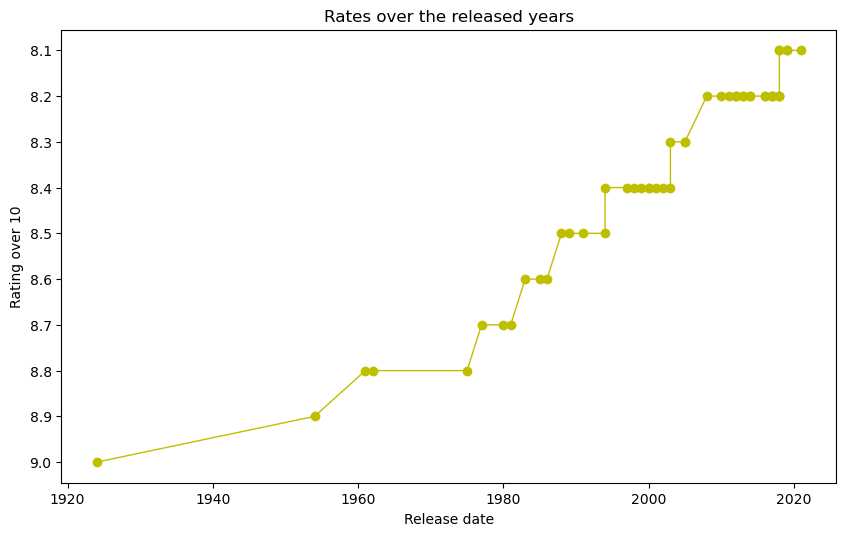

In [452]:
plt.figure(figsize = (10, 6), dpi = 100)
plt.plot(sorted(data_df["Release date"]), data_df["Rating over 10"], color = "y", linewidth = 1, marker = "o")
plt.xlabel("Release date")
plt.ylabel("Rating over 10")
# plt.title("Total profit of all months")
plt.title("Rates over the released years")
plt.show()